In [1]:
import pandas as pd

reqs = pd.read_json('training/requests.txt', lines=True, orient='records')
reqs.set_index('url', inplace=True)
reqs = reqs[~reqs.index.duplicated(keep='first')]

fb = pd.read_json('training/feedback.txt', lines=True, orient='records')
fb.drop(columns=['time'], inplace=True)
fb = fb.pivot_table(index='url', columns='action', aggfunc=len, fill_value=0)

df = reqs.join(fb, how='inner')
df.head()

,author,content,description,publishedAt,score,source,title,urlToImage,click,view
url,,,,,,,,,,
https://www.newscientist.com/article/2192364-weve-hacked-the-curiosity-rover-to-learn-how-mountains-form-on-mars/,Leah Crane,NASA/JPL-Caltech/MSSS\r\nBy Leah Crane\r\nHack...,Hacking the Curiosity rover let researchers me...,2019-01-31T00:00:00Z,0.994937,"{'id': 'new-scientist', 'name': 'New Scientist'}",We’ve hacked the Curiosity rover to learn how ...,https://images.newscientist.com/wp-content/upl...,0,3
https://www.newscientist.com/article/mg24132153-400-people-are-seeking-sperm-donors-online-but-are-the-risks-worth-it/,Clare Wilson,Using a private donor offers more control but ...,Meeting your sperm donor offers a more persona...,2019-01-30T00:00:00Z,0.980446,"{'id': 'new-scientist', 'name': 'New Scientist'}","People are seeking sperm donors online, but ar...",https://images.newscientist.com/wp-content/upl...,0,3
https://www.techradar.com/news/how-to-watch-super-bowl-2018-online-live-stream-from-anywhere-in-the-world,Adam Marshall,If you've landed on this page then it's becaus...,We're only days away from Super Bowl LIII,2019-01-31T12:55:58Z,0.970902,"{'id': 'techradar', 'name': 'TechRadar'}",Super Bowl 2019 live stream: how to watch Patr...,https://cdn.mos.cms.futurecdn.net/EEzMhpYjpraz...,0,3
https://www.recode.net/2019/1/30/18204501/mellody-hobson-corporate-suicide-diversity,Theodore Schleifer,Mellody Hobson is one of the most prominent bl...,Hobson is one of the most prominent black wome...,2019-01-31T02:02:02Z,0.963000,"{'id': 'recode', 'name': 'Recode'}","Mellody Hobson thinks too many all-white, all-...",https://cdn.vox-cdn.com/thumbor/ITuU1583yeQEJc...,0,3
https://www.recode.net/2019/1/30/18204484/facebook-zuckerberg-products-earnings-q4-2018-priorities,Kurt Wagner,Mark Zuckerberg did not sound like a man who i...,After two years of dealing with Russia and fak...,2019-01-31T01:45:00Z,0.952278,"{'id': 'recode', 'name': 'Recode'}",Mark Zuckerberg wants to get back to building ...,https://cdn.vox-cdn.com/thumbor/ZaxCTKUG928PoJ...,2,3


In [2]:
len(df)

516

In [3]:
y = (df['click'] > 0).astype(int).values
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
import numpy as np
from nlp import featurize

ft_cols = ['entities', 'keyterms', 'vector', 'text']
def flatten(x):
    return [x[c] for c in ft_cols]

features = df.apply(lambda x: pd.Series(flatten(featurize(x['title'] + ' ' + x['description'])), index=ft_cols), axis=1)
features.iloc[4]

entities    {'PERSON:mark zuckerberg': 1, 'ORG:facebook': ...
keyterms    {'facebook': 0.12879847130043015, 'zuckerberg'...
vector      [0.026049499933772736, 0.03671961805205427, 0....
text        Mark Zuckerberg wants to get back to building ...
Name: https://www.recode.net/2019/1/30/18204484/facebook-zuckerberg-products-earnings-q4-2018-priorities, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import FeatureHasher

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from joblib import dump

import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes=['No-Click', 'Click'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [6]:
F_train, F_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=42)

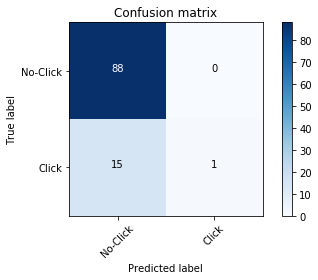

In [7]:
enty_pipeline = make_pipeline(
    DictVectorizer(), 
    TfidfTransformer(),
    GradientBoostingClassifier())
enty_pipeline.fit(F_train['entities'], y_train)
dump(enty_pipeline, 'training/entities.joblib')

y_enty_train = enty_pipeline.predict(F_train['entities'])
y_enty_test = enty_pipeline.predict(F_test['entities'])

plot_confusion_matrix(confusion_matrix(y_test, y_enty_test))

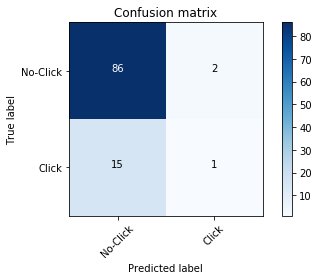

In [8]:
term_pipeline = make_pipeline(
    FeatureHasher(n_features=100, input_type='string'),
    GradientBoostingClassifier())
term_pipeline.fit(F_train['keyterms'], y_train)
dump(term_pipeline, 'training/keyterms.joblib')

y_terms_train = term_pipeline.predict(F_train['keyterms'])
y_terms_test = term_pipeline.predict(F_test['keyterms'])

plot_confusion_matrix(confusion_matrix(y_test, y_terms_test))

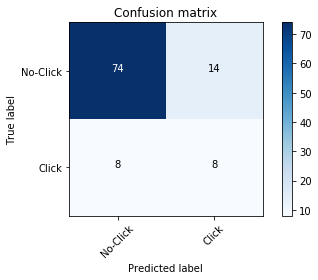

In [9]:
vec_pipeline = LogisticRegression(class_weight='balanced', solver='liblinear')
vec_pipeline.fit(np.stack(F_train['vector']), y_train)
dump(vec_pipeline, 'training/vector.joblib')

y_vec_train = vec_pipeline.predict(np.stack(F_train['vector']))
y_vec_test = vec_pipeline.predict(np.stack(F_test['vector']))

plot_confusion_matrix(confusion_matrix(y_test, y_vec_test))

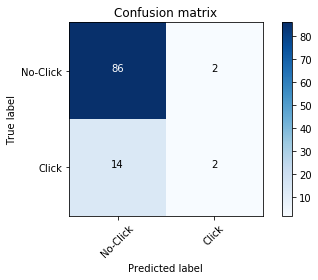

In [10]:
X_stack_train = np.column_stack([y_enty_train, y_terms_train, y_vec_train])
X_stack_test = np.column_stack([y_enty_test, y_terms_test, y_vec_test])

stack_pipeline = LogisticRegression(class_weight='balanced', solver='liblinear')
stack_pipeline.fit(X_stack_train, y_train)

y_stack_test = stack_pipeline.predict(X_stack_test)

plot_confusion_matrix(confusion_matrix(y_test, y_stack_test))

In [11]:
#See https://www.kaggle.com/metadist/work-like-a-pro-with-pipelines-and-feature-unions

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

class ItemSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        if self.key is "vector":
            return np.stack(data_dict[self.key])
        else:
            return data_dict[self.key]
    
class ClassifierWrapper(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator, verbose=None, fit_params=None, use_proba=True, scoring=None):
        self.estimator = estimator
        self.verbose = verbose #True = 1, False = 0, 1 - moderately verbose, 2- extra verbose    
        if verbose is None:
            self.verbose=0
        else:
            self.verbose=verbose
        self.fit_params= fit_params
        self.use_proba = use_proba #whether to use predict_proba in transform
        self.scoring = scoring # calculate validation score, takes score function name
        #TODO check if scorer imported?
        self.score = None #variable to keep the score if scoring is set.

    def fit(self,X,y):
        fp=self.fit_params
        if self.verbose==2: print("X: ", X.shape, "\nFit params:", self.fit_params)
        
        if fp is not None:
            self.estimator.fit(X,y, **fp)
        else:
            self.estimator.fit(X,y)
        
        return self
    
    def transform(self, X):
        if self.use_proba:
            return self.estimator.predict_proba(X) #[:, 1].reshape(-1,1)
        else:
            return self.estimator.predict(X)
    
    def fit_transform(self,X,y,**kwargs):
        self.fit(X,y)
        p = self.transform(X)
        if self.scoring is not None:
            self.score = eval(self.scoring+"(y,p)")
            #TODO print own instance name?
            if self.verbose >0: print("score: ", self.score) 
        return p
    
    def predict(self,X):
        return self.estimator.predict(X)
    
    def predict_proba(self,X):
        return self.estimator.predict_proba(X)

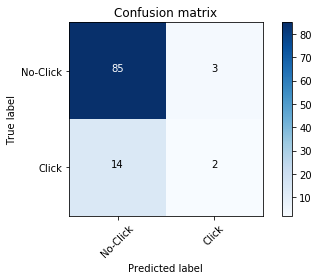

In [12]:
pipeline = Pipeline([
    ('union', FeatureUnion([
        ('entities', Pipeline([
            ('sel', ItemSelector(key='entities')),
            ('dic', DictVectorizer()),
            ('clf', ClassifierWrapper(GradientBoostingClassifier()))
        ])),
        ('keyterms', Pipeline([
            ('sel', ItemSelector(key='keyterms')),
            ('hsr', FeatureHasher(n_features=100, input_type='string')),
            ('clf', ClassifierWrapper(GradientBoostingClassifier()))
        ])),
        ('vector', Pipeline([
            ('sel', ItemSelector(key='vector')),
            ('clf', ClassifierWrapper(LogisticRegression(class_weight='balanced', solver='liblinear')))
        ]))
    ])),
    ('clf', LogisticRegression(class_weight='balanced', solver='liblinear'))
])

pipeline.fit(F_train, y_train)
y_pred = pipeline.predict(F_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred))